In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df = pd.read_csv("student-mat.csv", sep=";")

In [3]:
df = df[["age", "absences", "freetime", "Medu", "G1", "G2", "G3"]]

In [4]:
predict = "G3"

X = np.array(df.drop([predict], axis=1))
y = np.array(df[predict])

In [5]:
X

array([[18,  6,  3,  4,  5,  6],
       [17,  4,  3,  1,  5,  5],
       [15, 10,  3,  1,  7,  8],
       ...,
       [21,  3,  5,  1, 10,  8],
       [18,  0,  4,  3, 11, 12],
       [19,  5,  2,  1,  8,  9]], shape=(395, 6))

In [6]:
X.shape

(395, 6)

In [7]:
df.head()

,age,absences,freetime,Medu,G1,G2,G3
0,18,6,3,4,5,6,6
1,17,4,3,1,5,5,6
2,15,10,3,1,7,8,10
3,15,2,2,4,15,14,15
4,16,4,3,3,6,10,10


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
print(x_train.shape)
print(x_test.shape)

(355, 6)
(40, 6)


In [10]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.9332201846117197


In [11]:
model.coef_

array([-0.19453042,  0.04284487,  0.12541048,  0.01601531,  0.17321924,
        0.97728536])

In [12]:
model.intercept_

np.float64(0.5658349748044742)

In [13]:
model.predict([x_test[0]])

array([10.75845193])

In [14]:
x_test[0]

array([16,  6,  4,  4, 10, 11])

In [20]:
# y = a1x1+a2x2+a3x3+...+b
-0.19453042*16 + 0.04284487*6 + 0.12541048*4 + 0.01601531*4 + 0.17321924*10 + 0.97728536*11 + 0.5658349748044742

10.758451994804473

In [16]:
predicted = model.predict(x_test)
for i in range(len(predicted)):
    print(f"Real: {y_test[i]}, Predicted: {predicted[i]}")

Real: 11, Predicted: 10.758451933859332
Real: 7, Predicted: 5.66349367401714
Real: 14, Predicted: 14.26785886729002
Real: 10, Predicted: 9.718627776095186
Real: 11, Predicted: 11.12329997491235
Real: 7, Predicted: 6.802773680998656
Real: 19, Predicted: 20.282429642084384
Real: 5, Predicted: 4.155560930945457
Real: 0, Predicted: -1.429497471237841
Real: 11, Predicted: 9.918120292311876
Real: 0, Predicted: 3.576806763807866
Real: 12, Predicted: 10.905668541691476
Real: 11, Predicted: 9.246778813573185
Real: 13, Predicted: 13.584414736339252
Real: 15, Predicted: 14.735651448513018
Real: 10, Predicted: 9.025404177861208
Real: 11, Predicted: 10.643348330884258
Real: 13, Predicted: 12.73064055944787
Real: 0, Predicted: 0.02537641927414569
Real: 12, Predicted: 11.180023698567599
Real: 14, Predicted: 14.126115756810721
Real: 11, Predicted: 10.919512114017673
Real: 0, Predicted: -1.5890485452830028
Real: 11, Predicted: 9.9057854067208
Real: 15, Predicted: 14.740710159700903
Real: 9, Predicted: 

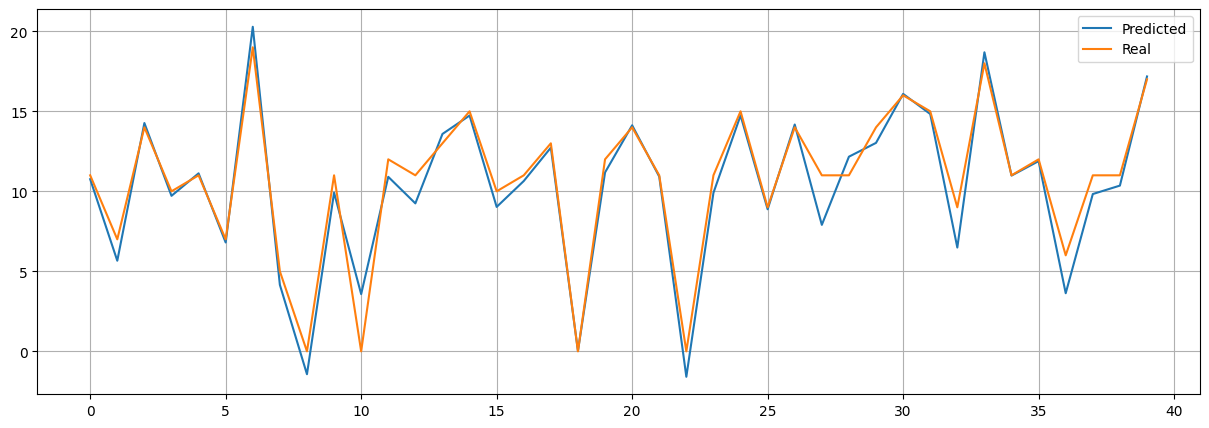

In [18]:
predictions = model.predict(x_test)
plt.figure(figsize=(15,5))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Real')
plt.legend()
plt.grid()
plt.show()